<a href="https://colab.research.google.com/github/Abhiruchi37/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
#Loading dataset
df = pd.read_csv('/content/WineQT.csv')

In [ ]:

# Let's add a new categorical column 'wine_type' for demonstration purposes
df['wine_type'] = pd.Categorical(np.random.choice(['Red', 'White'], size=len(df)))


In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id wine_type  
0      9.4        5   0     White  
1      9.8        5   1       Red  
2      9.8        5   2     White  
3      9.8        6   3       Red  
4      9.4        5   4     White

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

In [ ]:
df.shape

(1143, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1143 non-null   float64 
 1   volatile acidity      1143 non-null   float64 
 2   citric acid           1143 non-null   float64 
 3   residual sugar        1143 non-null   float64 
 4   chlorides             1143 non-null   float64 
 5   free sulfur dioxide   1143 non-null   float64 
 6   total sulfur dioxide  1143 non-null   float64 
 7   density               1143 non-null   float64 
 8   pH                    1143 non-null   float64 
 9   sulphates             1143 non-null   float64 
 10  alcohol               1143 non-null   float64 
 11  quality               1143 non-null   int64   
 12  Id                    1143 non-null   int64   
 13  wine_type             1143 non-null   category
dtypes: category(1), float64(11), int64(2)
memory usage: 117.

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
wine_type               0
dtype: int64

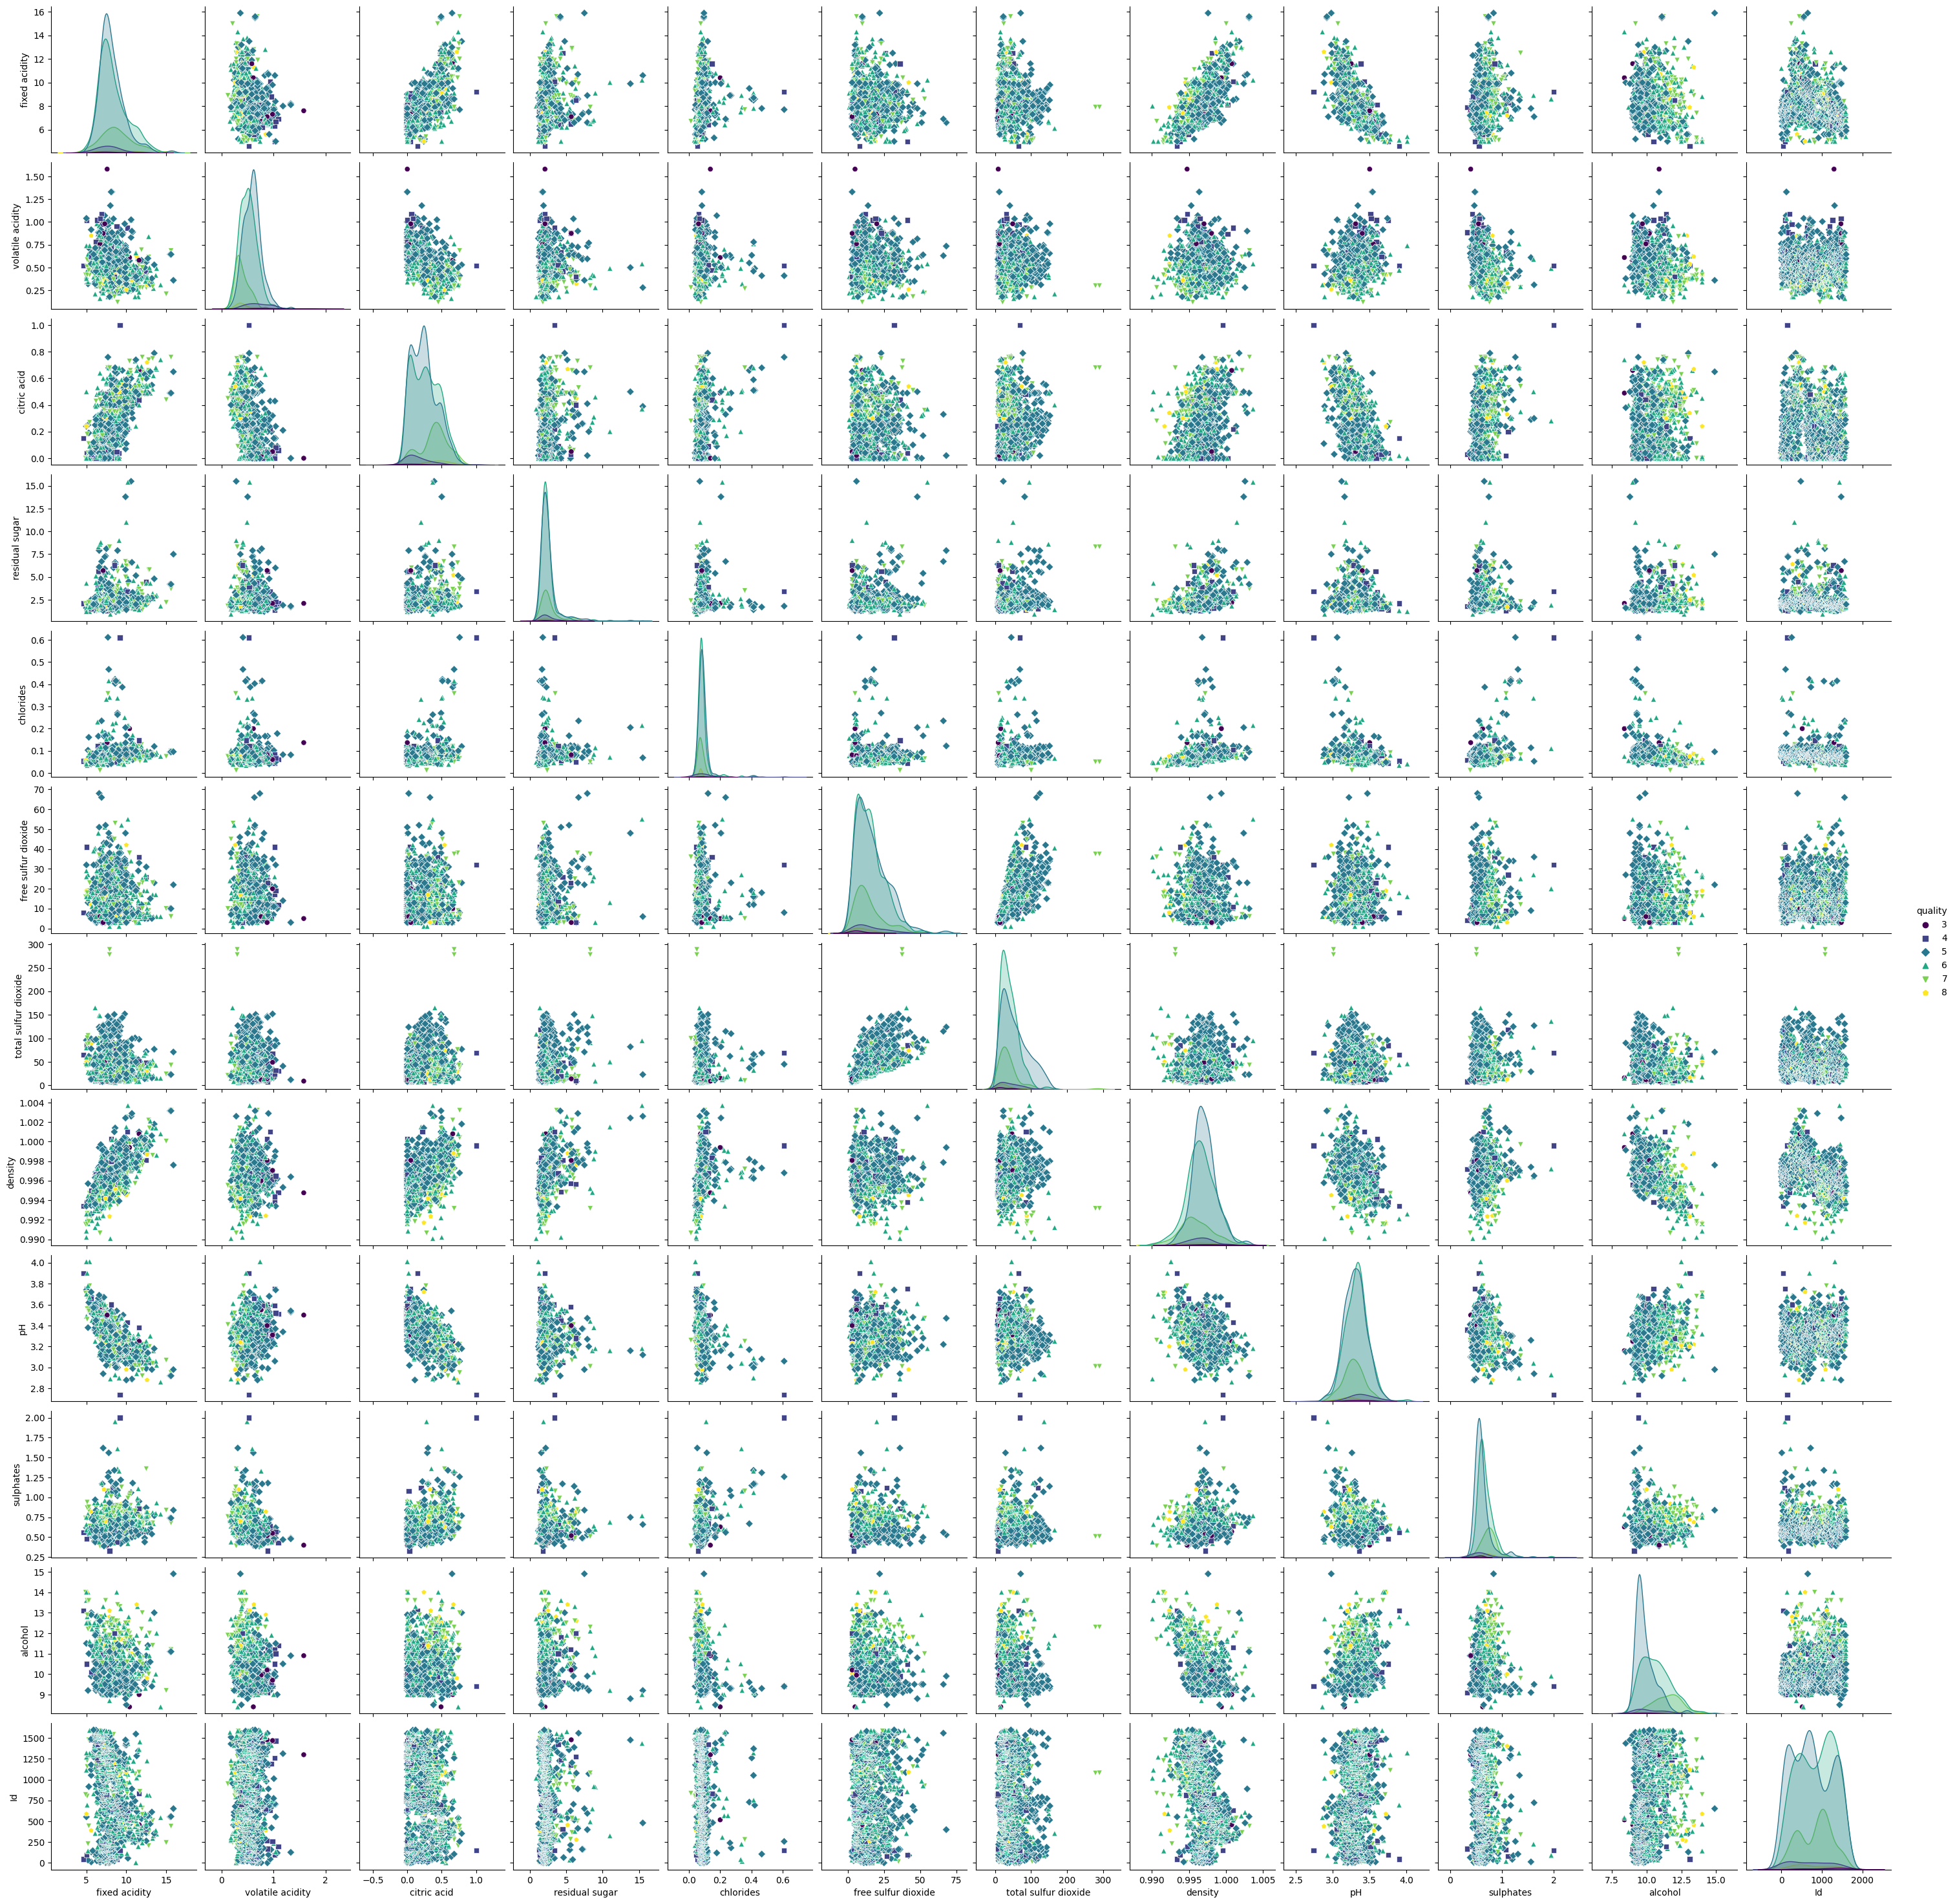

In [ ]:
# Pair plot for feature analysis
sns.pairplot(df, hue='quality', markers=["o", "s", "D", "^", "v", "p"], palette='viridis')
plt.show()

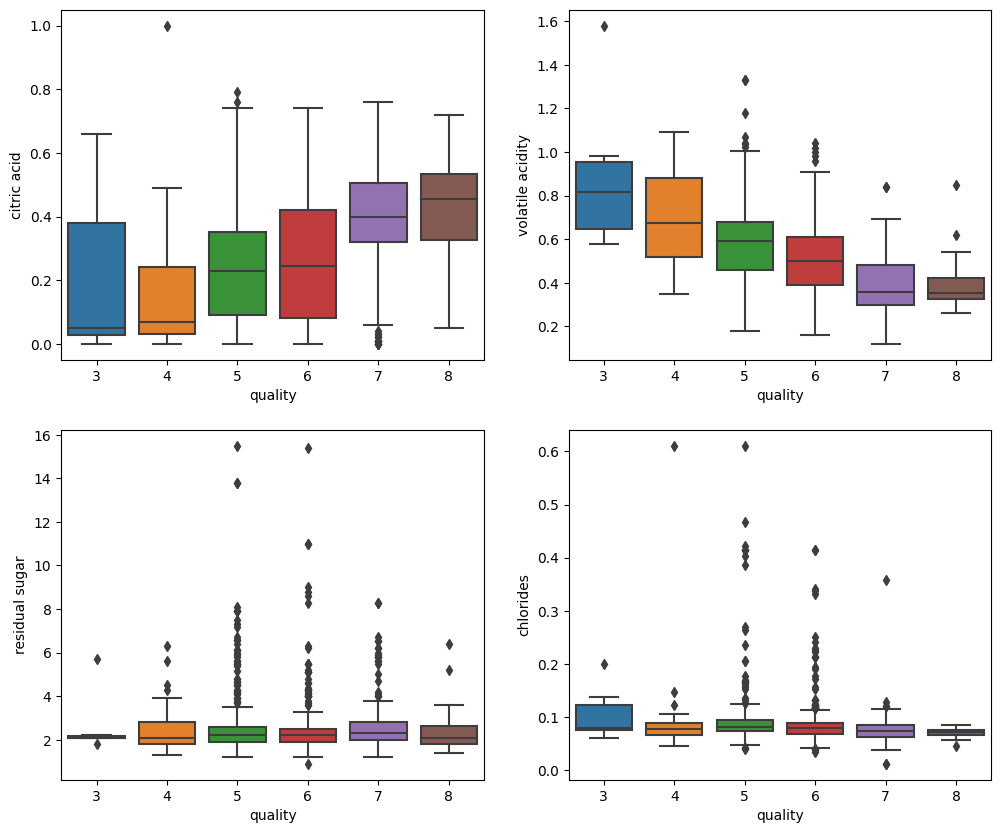

In [ ]:
# Box plots for further analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.boxplot(x='quality', y='citric acid', data=df, ax=axes[0, 0])
sns.boxplot(x='quality', y='volatile acidity', data=df, ax=axes[0, 1])
sns.boxplot(x='quality', y='residual sugar', data=df, ax=axes[1, 0])
sns.boxplot(x='quality', y='chlorides', data=df, ax=axes[1, 1])
plt.show()

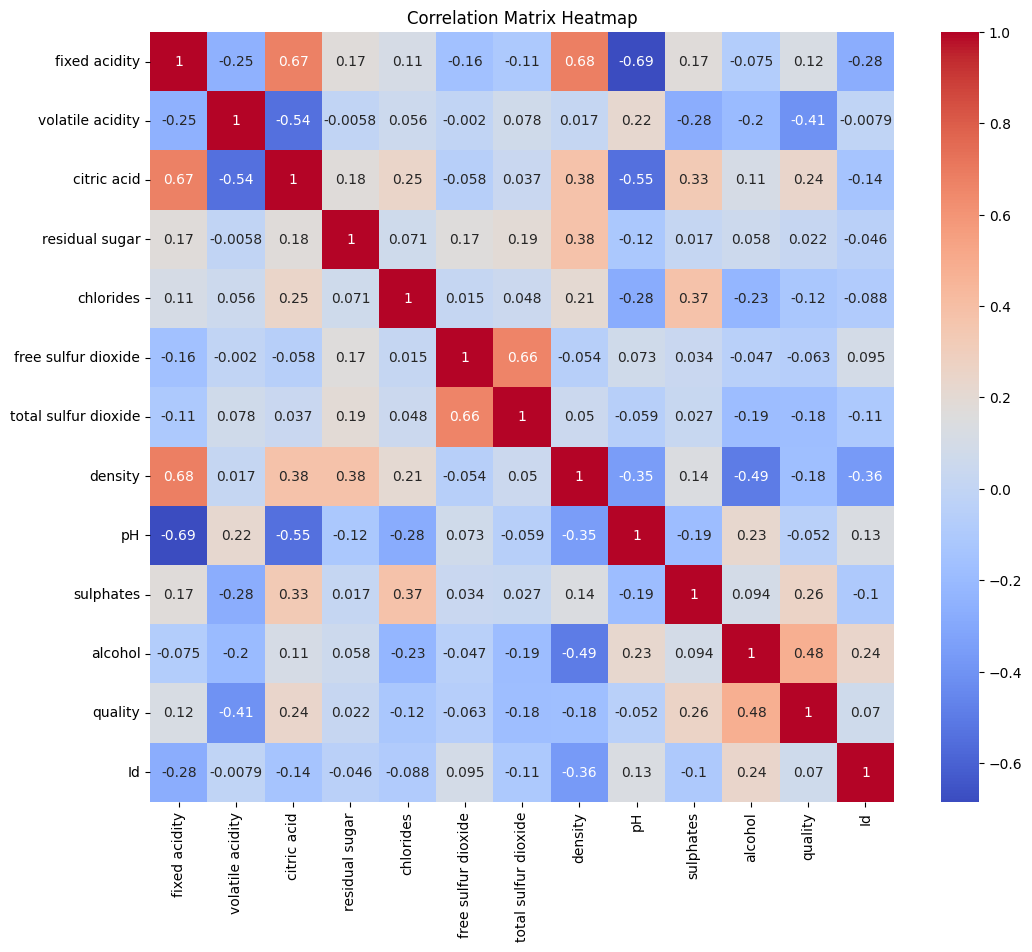

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Data Preprocessing
# quality=target variable
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['wine_type_encoded'] = label_encoder.fit_transform(X['wine_type'])


In [ ]:
# Drop the original categorical column if needed
X = X.drop('wine_type', axis=1)

In [ ]:
df['wine_type'].value_counts()

Red      577
White    566
Name: wine_type, dtype: int64

In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
# Create a Support Vector Machine (SVM) classifier
svm_model = SVC()

In [ ]:
# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")

SVM Model Accuracy: 0.65


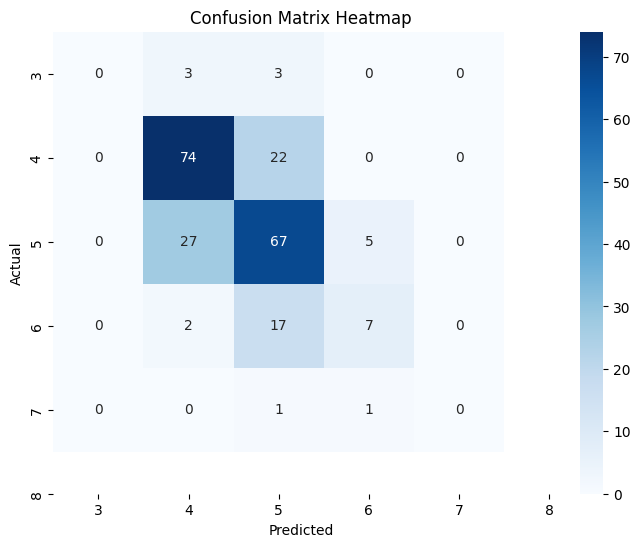

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Display heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.77      0.73        96
           6       0.61      0.68      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.37      0.34      0.35       229
weighted avg       0.62      0.65      0.63       229



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)


In [ ]:
# Train the model
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

In [ ]:
# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.2f}")


Gradient Boosting Model Accuracy: 0.70


In [ ]:
# Display classification report for Gradient Boosting model
print("Gradient Boosting Model Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Model Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.75      0.79      0.77        96
           6       0.68      0.68      0.68        99
           7       0.74      0.65      0.69        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.36      0.35      0.36       229
weighted avg       0.69      0.70      0.69       229



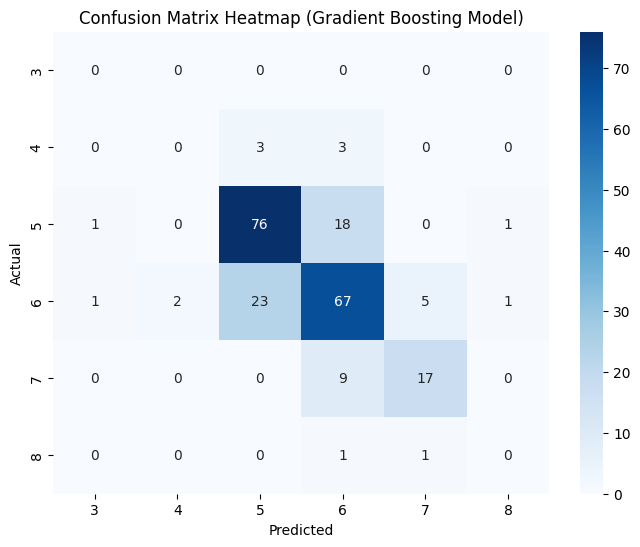

In [ ]:
# Create a confusion matrix for Gradient Boosting model
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Display heatmap of the confusion matrix for Gradient Boosting model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Gradient Boosting Model)')
plt.show()